# Data Visualization 

This notebook presents a important data visualizations for the disaster response.

In [1]:
# import libraries
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import warnings
import sys
import os
import re
import pickle

warnings.simplefilter('ignore')



In [2]:
# load data from database
engine = create_engine('sqlite:///disaster_response.db')
df = pd.read_sql_table('disaster_response', engine)


In [3]:
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Univariate analysis

#### Message Genre
This is the different means through which messages were sent during the disaster

news      0.500845
direct    0.408560
social    0.090595
Name: genre, dtype: float64


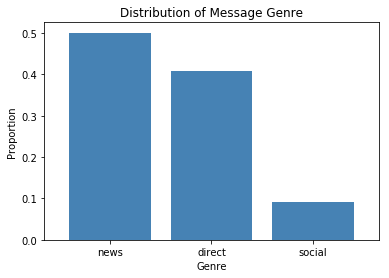

In [4]:
#view distribution of the different ways messages were sent during disaster
genre_prop = (df['genre'].value_counts()/df.shape[0])
genre_prop.plot(kind='bar', width=0.8,color = 'steelblue');
plt.title('Distribution of Message Genre')
plt.xlabel('Genre');
plt.ylabel('Proportion');
plt.xticks(rotation = 0);
print(genre_prop)

So we see in the figure above that 50% of the messages were sent through news, 41% directly to disaster response organization and only 9% were sent via social media.

#### Categories of disaster response messages

In [5]:
categories = df.iloc[:,4:] #target variables
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,water,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


related            19906
aid_related        10860
weather_related     7297
direct_report       5075
request             4474
dtype: int64


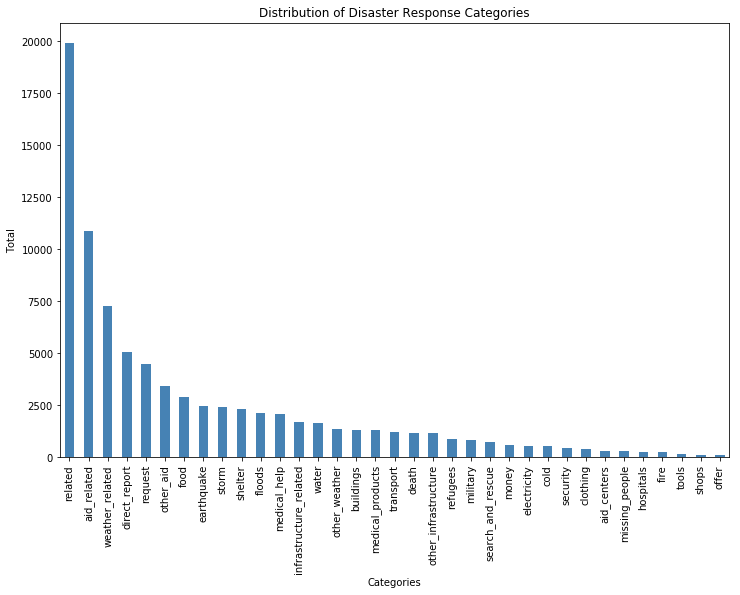

In [6]:
#total data points
cat_sum = categories.sum().sort_values(ascending = False)
print(cat_sum[:5]) #print first 5

#create visual
plt.figure(figsize=(12,8))
cat_sum.plot(kind='bar', color = 'steelblue')
plt.title("Distribution of Disaster Response Categories")
plt.xlabel('Categories');
plt.ylabel('Total');


We notice from the figure that `related` disaster response type has a high number of data points, approximately twice that of `aid_related` disaster response type. 

It will be interesting to view the distribution of the rsponse types excluding `related`. Let us now look at proportion

aid_related        0.417243
weather_related    0.280352
direct_report      0.194982
request            0.171892
other_aid          0.132396
food               0.112302
earthquake         0.094321
storm              0.093860
shelter            0.088904
floods             0.082795
dtype: float64


Text(0,0.5,'Proportion')

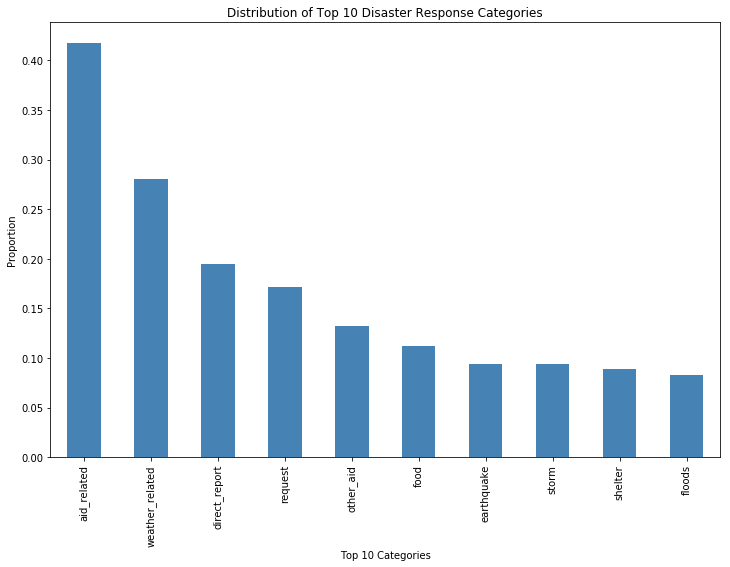

In [7]:
cat_prop = categories.mean().sort_values(ascending = False)
print(cat_prop[1:11])
plt.figure(figsize=(12,8))
cat_prop[1:11].plot(kind='bar', color = 'steelblue')
plt.title("Distribution of Top 10 Disaster Response Categories");
plt.xlabel('Top 10 Categories');
plt.ylabel('Proportion')


So different response types fell in the aid_related and weather_related categories.

### Bivariate analysis

We want to see which message genre were mostly used to send which message durng the disaster

In [17]:
def filter_df(df,val ):
    """A funtion that takes as input, a dataframe and unique value of a
        given column and plots its distribution
    """
    df_genre = df[df['genre'] == val]
    cat_df = df_genre.iloc[:,4:] #target variables
    cat_prop = cat_df.mean().sort_values(ascending = False)

    plt.figure(figsize=(12,8))
    cat_prop[1:11].plot(kind='bar', color = 'steelblue')
    plt.title("Distribution of Different Disaster Response Type vs message genre");

    plt.show()
    return

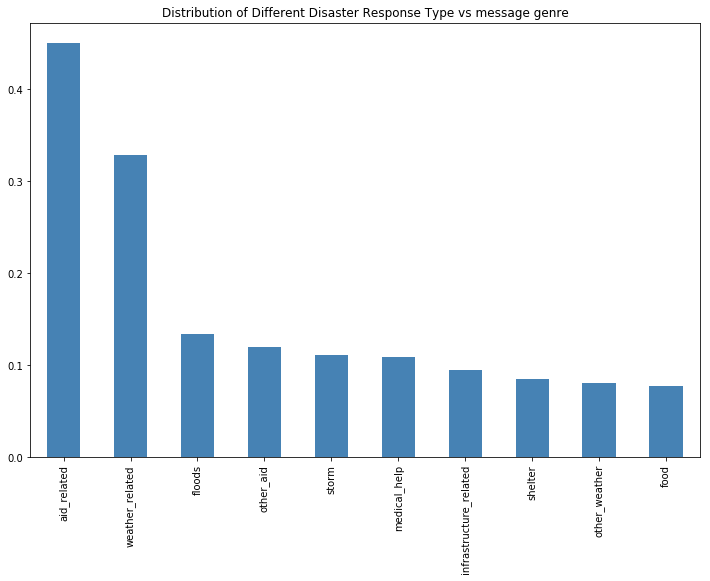

In [18]:
filter_df(df,'news')

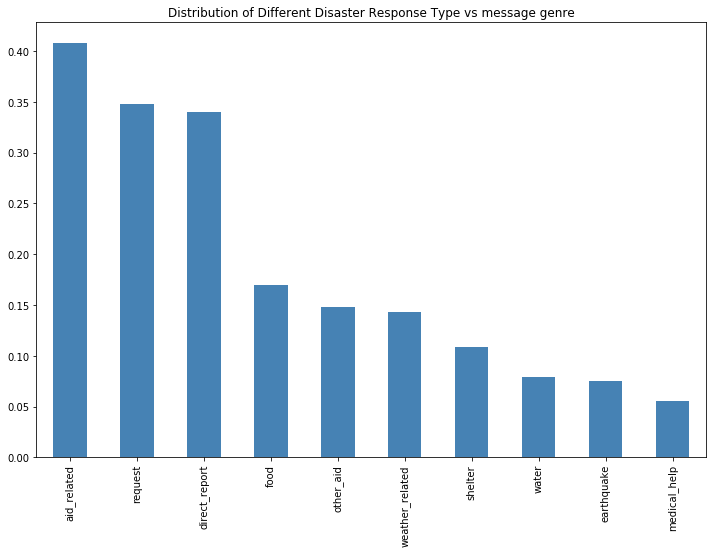

In [19]:
filter_df(df,'direct')

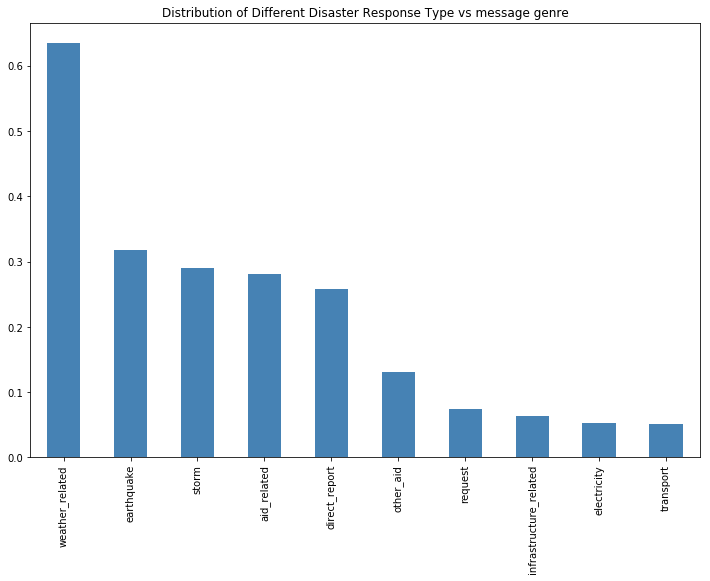

In [20]:
filter_df(df,'social')

## Summary and Conclusion

We have seen that during a disaster, there are three major message genre through which messages are sent. These are
- news
- direct (directly to disaster response organization)
- socials

Now depending on the category of disaster response, there's a preference to the different message genre type. 

- Most weather related disaster response are more reported through news or socials
- Disaster response categories such as food, request and direct_report, are reported more frequently and directly to disaster response organizations.